# Lab 2.2: Radiative budget, forcing and temperature response

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 4</h1></div>

1. Run the model for the 4 future representative concentration pathways (RCPs): RCP2.6, RCP4.5, RCP6.0 and RCP8.5.
Use a for loop to run the 4 simulations. For more information on scenarios see the [Running with built-in emissions scenarios page in the documentation.](http://www.princeton.edu/~skclark/oscar/built_in_scens.html)

In [2]:
end_date = 2100
SCENARIOS = ['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']

# Generate a dictionary storing the results of each simulation as the value
# to a key of the name of the RCP scenario.
results = {scen: OSCAR(scen_ALL=scen).run(end_date) for scen in SCENARIOS}

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
    <li>Plot the carbon fossil fuel emissions corresponding to the different RCPs on same figure and include label. Focus your plot on years 1950 to 2050.</li>
</ol>

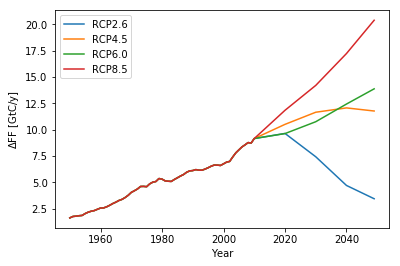

In [3]:
fig, ax = plt.subplots(1, 1)
year = np.arange(len(results['RCP8.5']['EFF']['Total'])) + 1700

for scenario in SCENARIOS:
    total = results[scenario]['EFF']['Total']
    ax.plot(year[250:350], total[250:350], label=scenario)
    
ax.set_xlabel('Year')
ax.set_ylabel('$\mathregular{\Delta}$FF [GtC/y] ')
ax.legend(loc='upper left')

<ol start="3">
    <li>Read the observed atmospheric CO2 (see Lab 1.1 Scripps data).</li>
    <li>Plot the model change in atmospheric CO2 as a function of time for the 4 RCPs (variable D_CO2).  Again focus on years 1950 to 2050.</li>
    <li>Overplot the observed atmospheric CO2. Hint: D_CO2 is an anomaly in CO2 concentration (reference to first year of run) while observations are in concentration. You will need to offset one of the data sets to start at the same point in 1960.</li>
</ol>

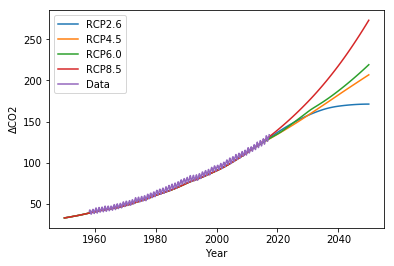

In [4]:
# 3. Read monthly CO2 measurements from Scripps.
data = np.loadtxt('monthly_in_situ_co2_mlo.csv', skiprows=57, delimiter=',')
time = data[:, 3]
co2 = data[:, -2]
co2 = np.ma.masked_where(co2 < 0, co2)  # Missing values are encoded as -99.0; we can mask these

# 4. Plot CO2 in RCPs
fig, ax = plt.subplots(1, 1)
for scenario in SCENARIOS:
    simulated_co2 = results[scenario]['D_CO2']
    ax.plot(year[250:351], simulated_co2[250:351], label=scenario)
ax.set_xlabel('Year')
ax.set_ylabel('$\mathregular{\Delta}$CO2 ')

# 5. overplot data
ax.plot(time, co2 - 275, label= 'Data')
ax.legend(loc='upper left')

<ol start="6">
    <li>Re-do the CO2 plot (model + data) by focusing only on the 1950 - 2030 period. Can we say what scenario we have been following between 2006 and 2017?</li>
</ol>

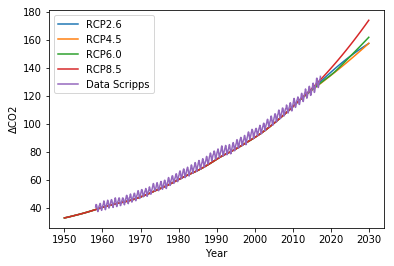

In [5]:
start_idx = 1950 - 1700
end_idx = 2030 - 1700 + 1

fig, ax = plt.subplots(1, 1)
for scenario in SCENARIOS:
    simulated_co2 = results[scenario]['D_CO2']
    ax.plot(year[start_idx:end_idx], simulated_co2[start_idx:end_idx], label=scenario)
    
ax.set_xlabel('Year')
ax.set_ylabel('$\mathregular{\Delta}$CO2 ')

ax.plot(time, co2 - 275, label= 'Data Scripps')
ax.legend(loc='upper left')

<ol start="7">
    <li>Load observed temperature from HadCrut4 dataset (see Lab1.2).</li>
    <li>Plot change in temperature (D_gst) in the 4 RCPs and overplot observed temperature (HadCrut4 time-series).   Note again that you will need to offset one of the datasets.  In this case both D_gst and the temperature from the HadCrut dataset are anomalies; however, they are anomalies with different reference periods.  The Hadcrut dataset is a deviation referenced to the mean temperature anomaly between the years 1960 and 1990.  Therefore one way to do the offset is to add the mean D_gst from any of the emissions scenarios between 1960 and 1990 to the result from the Hadcrut dataset.  This way they will have the same mean anomaly between 1960 and 1990.  Discuss.</li>
</ol>

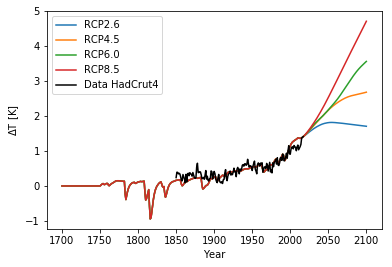

In [6]:
# 7. Load the temperature data
data = np.loadtxt('HadCrut4_annual.csv')
data_year = data[:, 0]
data_temp = data[:, 1]

data_temp = np.mean(data[:, 1:], axis=1)

# 8. Plot change in temperature
fig, ax = plt.subplots(1, 1)

simulated_temp = results['RCP8.5']['D_gst']
m = np.mean(simulated_temp[1960 - 1700:1990 - 1700])

for scenario in SCENARIOS:
    simulated_temp = results[scenario]['D_gst']
    ax.plot(year, simulated_temp, label=scenario)

ax.plot(data_year, data_temp + m, 'k', label='Data HadCrut4')
ax.set_xlabel('Year')
ax.set_ylabel('$\mathregular{\Delta}$T [K]')

ax.legend(loc='upper left')